In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [58]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [59]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [60]:
X = data.data
y = data.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score = ', r2_score(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score =  0.45260276297191937
Root Mean Squared Error =  53.85344583676593


## Now applying the Ridge regression and check

In [67]:
from sklearn.linear_model import Ridge
ridge = Ridge(0.0001)
ridge

Ridge(alpha=0.0001)

In [68]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [69]:
y_pred_ridge = ridge.predict(X_test)

In [70]:
print('R2 score = ', r2_score(y_test, y_pred_ridge))
print('Root Mean Squared Error = ', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R2 score =  0.4526998154220099
Root Mean Squared Error =  53.84867157029351


### Generate an own dataset to see underfitting and overfitting

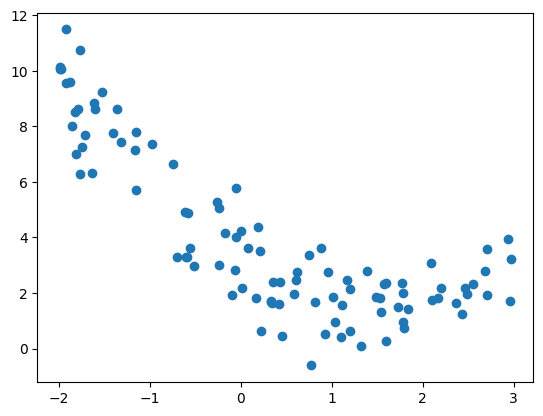

In [71]:
m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m,1)

plt.scatter(x1, x2)
plt.show()

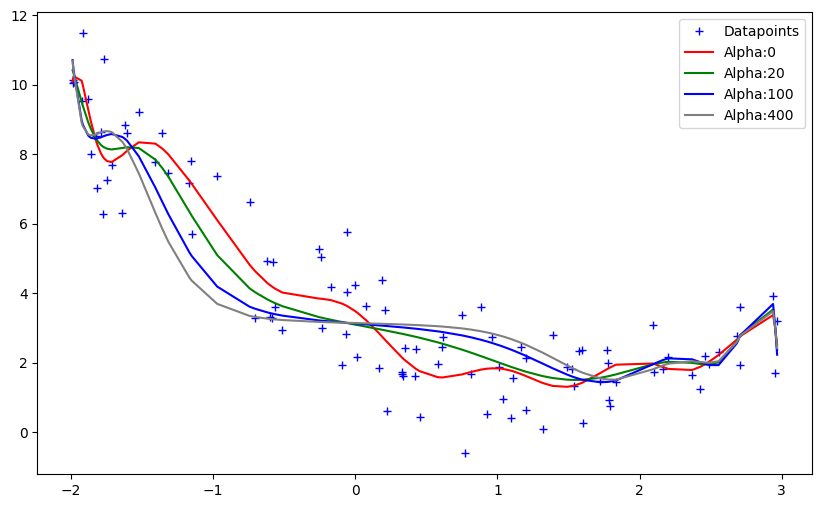

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def get_pred_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])

    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 100, 400]
cs = ['r', 'g', 'b', 'grey']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label = 'Datapoints')

for alpha, c in zip(alphas, cs):
    # print(alpha, c)
    preds = get_pred_ridge(x1, x2, alpha)
    # print(preds)
    # print(sorted(x1[:,0]))
    # print(preds[np.argsort(x1[:, 0])].shape)
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:, 0])], c, label = 'Alpha:{}'.format(alpha))

plt.legend()
plt.show()